# 07 · Prediction cards (Phase E)

This notebook demonstrates three publishable cards using **paper-derived hooks**:

1. Weak mixing curve $\sin^2\!\theta_W(k)$ with an uncertainty band.
2. Cosmology: a direct $\Lambda$ proxy from $\lambda_{\infty}(q,R)$.
3. Neutron EDM proxy from depth-parity CPV.

Swap the internal maps by loading `emergent.paper_maps.v8`.

Loaded paper-derived hooks: emergent.paper_maps.v8


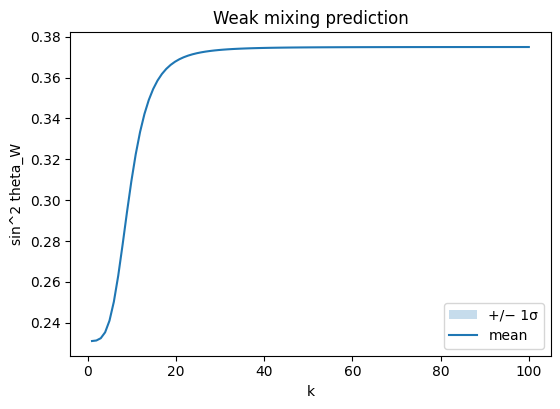

{'title': 'Weak mixing prediction', 'central': {'sin2_thetaW_EW': 0.23101771558027506, 'alpha_EM_EW': 0.007816152331564684, 'theta_cp_EW': -0.04052230189509814, 'g_star_EW': 0.08690933878716299, 'lambda_mix_EW': 4.722765741771795}, 'interval': {'sin2_thetaW_band@EW': (0.23101771558027506, 0.23101771558027506)}}
{'title': 'Cosmology (Λ proxy)', 'central': {'Lambda_proxy': 0.7346938775510203, 'dS_dt': 0.0}}
{'title': 'Neutron EDM proxy', 'central': {'d_n_EDM_proxy': 4.052230189509814e-18, 'edm_n': 4.052230189509814e-18, 'theta_cp_EW': -0.04052230189509814}}


In [1]:
import numpy as np, matplotlib.pyplot as plt
from emergent.rg import CouplingVector
from emergent.physics_maps import make_hooks_from_module
from emergent.predict import make_card_weakmix, make_card_cosmology, make_card_edm, predict_weak_mixing_curve

# Load paper maps (v8); fall back to defaults if unavailable
try:
    hooks = make_hooks_from_module("emergent.paper_maps.v8")
    print("Loaded paper-derived hooks: emergent.paper_maps.v8")
except Exception as e:
    from emergent.physics_maps import default_hooks as hooks
    print("Falling back to default hooks (", e, ")")

g0 = CouplingVector(g_star=0.1, lambda_mix=0.5, theta_cp=0.2)
q, R = 13, 2
k_start, k_end = 100, 1

# --- Card 1: weak mixing ---
card_w = make_card_weakmix(g0, q=q, R=R, k_start=k_start, k_end=k_end, n_grid=101, bootstrap=32, hooks=hooks)
curve, _ = predict_weak_mixing_curve(g0, q=q, R=R, k_start=k_start, k_end=k_end, n_grid=101, bootstrap=32, seed=0, hooks=hooks)
plt.figure(figsize=(6.2,4.2))
plt.fill_between(curve.k, curve.lo, curve.hi, alpha=0.25, label="+/− 1σ")
plt.plot(curve.k, curve.mean, label="mean")
plt.xlabel("k"); plt.ylabel("sin^2 theta_W"); plt.title("Weak mixing prediction"); plt.legend(); plt.show()
print(card_w.to_dict())

# --- Card 2: cosmology ---
card_c = make_card_cosmology(q=q, R=R, hooks=hooks)
print(card_c.to_dict())

# --- Card 3: EDM ---
card_e = make_card_edm(g0, q=q, R=R, k_start=k_start, k_end=k_end, hooks=hooks)
print(card_e.to_dict())